Exploring Activation Functions in Neural Networks<br>
Objective: To explore and compare different activation functions used in artificial neural networks and understand their impact on the output of a neural network.<br>
Scenario: You are tasked with implementing and visualizing various activation functions to observe how they transform inputs and affect the output. You will also train a simple neural network using these activation functions and evaluate their performance.<br>
Lab Tasks:<br>
1. Implement and Visualize Activation Functions:<br>
o Implement the following activation functions in Python:<nr>
▪ Step Function<br>
▪ Sigmoid Function (Binary and Bipolar)<br>
▪ Tanh Function<br>
▪ ReLU Function<br>
o Visualize each activation function using matplotlib/seaborn/bokeh to observe how they map input values to output values.<br>
<br>

2. Implement a Simple Neural Network:<br>
• Create a simple neural network with one hidden layer using each activation function (sigmoid, tanh, and ReLU).<br>
• Train the network on a binary classification task (e.g., XOR problem) using a small dataset.<br>
• Compare the performance of the neural network with different activation functions.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# Set a style for better visual aesthetics
sns.set(style="whitegrid")


1. Step Function<br>
Definition: The step function is a simple binary activation function that outputs either a 1 or a 0 depending on whether the input is above or below a certain threshold (usually zero).<br>
<br>
Mathematically:𝑓(𝑥) = {1 if 𝑥≥0, 0 if 𝑥<0}<br>
<br>
 
Properties:<br>
1. Binary Output: Outputs only 0 or 1.
2. Non-Differentiable: The function is not differentiable at the threshold point, making it unsuitable for gradient-based optimization methods.
3. Use Cases: Typically used in simple models and is more historical, as it was one of the first activation functions. It can be applied in binary classification scenarios, particularly in the output layer.

In [27]:
# 1. Implement and Visualize Activation Functions
def step_function(x):
    return np.where(x >= 0, 1, 0)

2. Sigmoid Function<br>
Definition: The sigmoid function is an S-shaped curve that maps any real-valued number into the range (0, 1).<br>
<br>
Mathematically:𝑓(𝑥) = 1 /(1 + 𝑒^(−𝑥)) <br>
​<br>
 
Properties:<br>
1. Smooth and Continuous: The sigmoid function is continuous and differentiable everywhere, which allows for gradient descent optimization.
2. Output Range: Outputs values between 0 and 1, making it suitable for binary classification tasks (as a probability estimate).
3. Vanishing Gradient Problem: For very high or very low values of x, the gradient becomes very small, which can slow down learning and lead to the vanishing gradient problem in deep networks.
4. Use Cases: Often used in the output layer for binary classification problems.

In [28]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

3. Bipolar Sigmoid Function<br>
Definition: The bipolar sigmoid function is similar to the traditional sigmoid function but maps inputs to the range (-1, 1) instead of (0, 1).<br>
<br>

Mathematically: 𝑓(𝑥) = [2/(1 + e^(-x))] - 1 <br>
or equivalently, 𝑓(𝑥) = tanh(𝑥)<br>
<br>

Properties:<br>
1. Output Range: Outputs values between -1 and 1, which makes it zero-centered, similar to the Tanh function.
2. Smooth and Continuous: The bipolar sigmoid function is differentiable everywhere, allowing for effective gradient-based optimization.
3. Vanishing Gradient Problem: Like the traditional sigmoid, it suffers from the vanishing gradient problem for large positive or negative input values, where the gradients become very small.
4. Use Cases: It is less common in practice compared to the standard sigmoid and tanh functions, but it can be used in certain neural network architectures where zero-centered outputs are desired.

In [29]:
def bipolar_sigmoid(x):
    return (1 - np.exp(-x)) / (1 + np.exp(-x))

4. Tanh Function<br>
Definition: The hyperbolic tangent function (tanh) is another S-shaped curve, similar to the sigmoid function, but it maps inputs to the range (-1, 1).<br>
<br>
Mathematically:𝑓(𝑥) = tanh(𝑥) = [𝑒^(𝑥) − 𝑒^(−𝑥)] / [e^(x) + e^(-x)]<br>
<br>
 
Properties:<br>
1. Output Range: Outputs values between -1 and 1, providing zero-centered outputs, which can help in training convergence.
2. Smooth and Continuous: Like the sigmoid function, it is differentiable and has a continuous derivative.
3. Less Susceptible to Vanishing Gradients: It still suffers from the vanishing gradient problem, but to a lesser extent than the sigmoid function.
4. Use Cases: Commonly used in hidden layers of neural networks, particularly in recurrent neural networks (RNNs) where zero-centered data can be beneficial.

In [30]:
def tanh(x):
    return np.tanh(x)

5. ReLU Function<br>
Definition: The Rectified Linear Unit (ReLU) function is a piecewise linear function that outputs the input directly if it is positive; otherwise, it outputs zero.<br>
<br>
Mathematically: 𝑓(𝑥) = max (0,𝑥)<br>
<br>

Properties:<br>
1. Non-Linearity: Introduces non-linearity to the model while maintaining computational simplicity.
2. Output Range: Outputs values from 0 to infinity (non-negative).
3. Computational Efficiency: ReLU is computationally efficient because it involves simple thresholding at zero.
4. Dying ReLU Problem: During training, some neurons can become inactive and always output zero (known as dying ReLU), which can lead to issues in learning. Variants like Leaky ReLU and Parametric ReLU have been introduced to address this.
5. Use Cases: Widely used in hidden layers of deep neural networks, especially for image data, as it has been found to work well in practice.

In [31]:
def relu(x):
    return np.maximum(0, x)

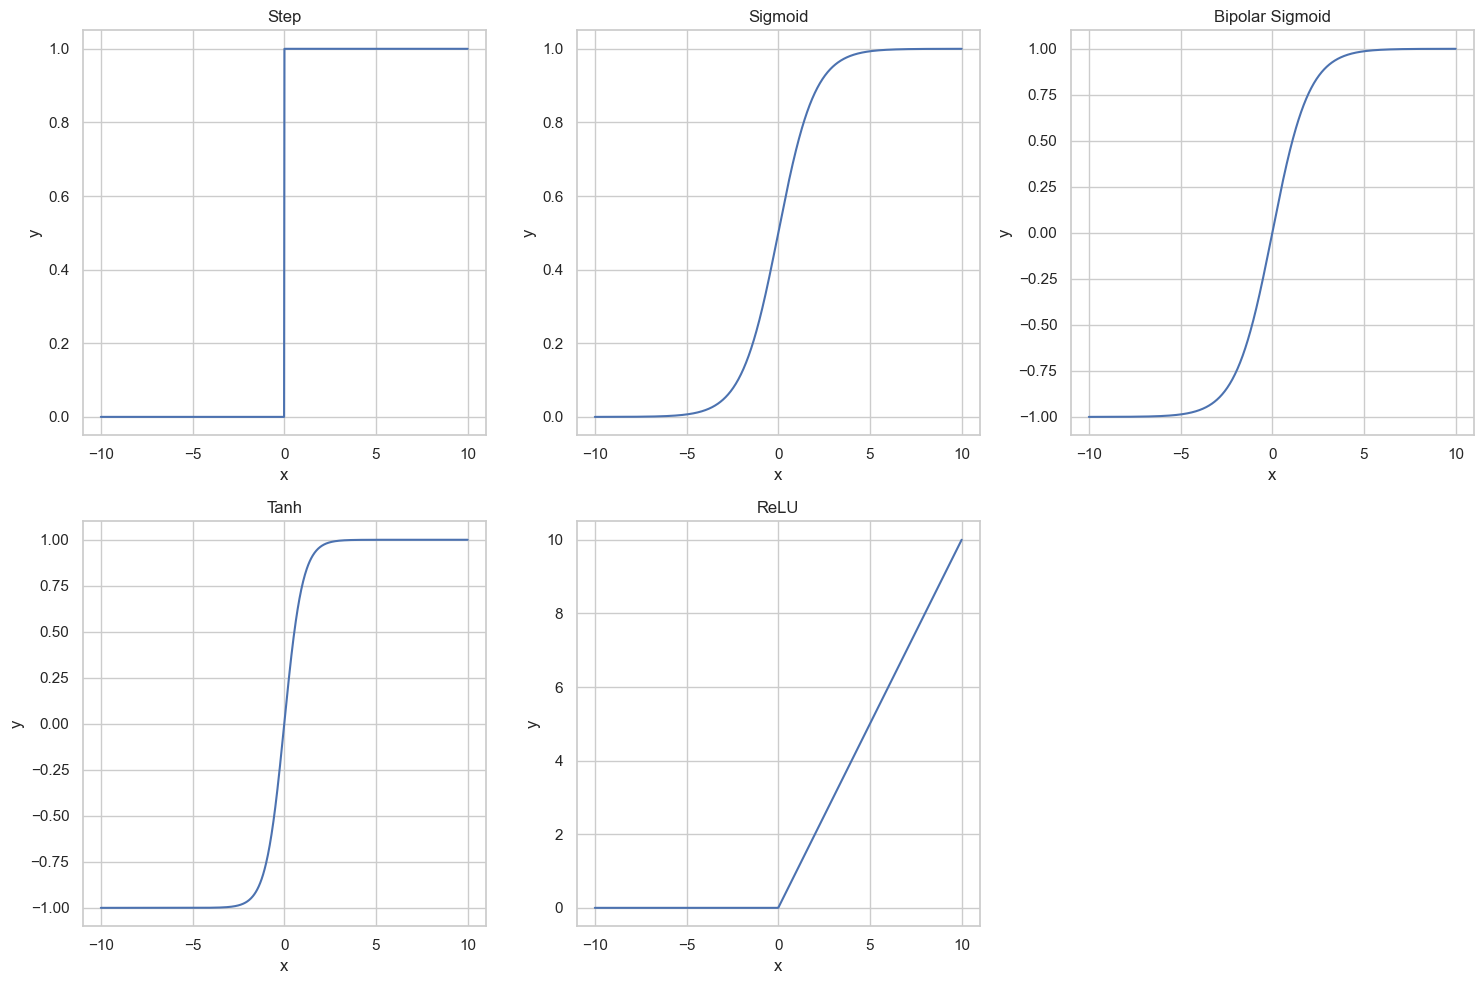

In [32]:
# Visualize activation functions
x = np.linspace(-10, 10, 1000)
functions = [
    ("Step", step_function),
    ("Sigmoid", sigmoid),
    ("Bipolar Sigmoid", bipolar_sigmoid),
    ("Tanh", tanh),
    ("ReLU", relu)
]

plt.figure(figsize=(15, 10))
for i, (name, func) in enumerate(functions, 1):
    plt.subplot(2, 3, i)
    plt.plot(x, func(x))
    plt.title(name)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
plt.tight_layout()
plt.show()



### Summary of All Five Activation Functions

| Activation Function   | Range         | Derivative at Zero             | Main Use Cases                                |
|-----------------------|---------------|---------------------------------|------------------------------------------------|
| **Step**              | {0, 1}        | Not defined                     | Simple binary classification                   |
| **Sigmoid**           | (0, 1)        | Very small (near 0)            | Output layer for binary classification         |
| **Bipolar Sigmoid**   | (-1, 1)      | Small (near 0)                  | Certain neural networks needing zero-centered outputs |
| **Tanh**              | (-1, 1)      | Small (near 0)                  | Hidden layers in neural networks               |
| **ReLU**              | [0, ∞)        | 0 for x ≤ 0, 1 for x > 0       | Hidden layers in deep networks, especially in CNNs |

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [34]:
# 2. Implement a Simple Neural Network

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Create models with different activation functions
def create_model(activation):
    model = Sequential([
        Dense(4, input_shape=(2,), activation=activation),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    return model

activations = ['sigmoid', 'tanh', 'relu']
histories = {}

for activation in activations:
    model = create_model(activation)
    history = model.fit(X, y, epochs=1000, verbose=0)
    histories[activation] = history.history

# Evaluate models
for activation in activations:
    model = create_model(activation)
    model.fit(X, y, epochs=1000, verbose=0)
    loss, accuracy = model.evaluate(X, y, verbose=0)
    print(f"{activation.capitalize()} - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

Sigmoid - Loss: 0.0086, Accuracy: 1.0000
Tanh - Loss: 0.0019, Accuracy: 1.0000
Relu - Loss: 0.4780, Accuracy: 0.7500
